In [1]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from copy import deepcopy


In [2]:
M = 100

p = 0.01
space = None

def game(space):
    space_out = np.zeros(shape=space.shape)
    nadj = 0
    for i in range(M):
        for j in range(M):
            nadj = adj(space,i,j)
            # Alive
            if space[i][j] == 1:
                if nadj < 2:
                    space_out[i][j] = 0
                elif nadj > 3:
                    space_out[i][j] = 0
                else:
                    space_out[i][j] = 1
            # Dead
            else:
                if nadj == 3:
                    space_out[i][j] = 1
    for i in range(M):
        for j in range(M):
            space[i][j] = space_out[i][j]
    return space

def random_blob(space):
    center_i = np.random.randint(M//4,M//2 + M//4)
    center_j = np.random.randint(M//4,M//2 + M//4)
    
    i_l = center_i-1
    i_r = center_i+1
    j_l = center_j-1
    j_r = center_j+1
    if i_l < 0:
        i_l = space.shape[0] - 1 
    if j_l < 0:
        j_l = space.shape[0] - 1
    if i_r > space.shape[0] - 1:
        i_r = 0 
    if j_r > space.shape[1] -1:
        j_r = 0
    ## Make blob
    #space[i_l][j_l] = 1
    space[i_l][center_j] = 1
    space[i_l][j_r] = 1
    space[center_i][j_l] = 1
    space[center_i][j_r] = 1
    space[i_r][j_l] = 1
    space[i_r][center_j] = 1
    #space[i_r][j_r] = 1
    
                    
def adj(space,i,j):
    i_l = i-1
    i_r = i+1
    j_l = j-1
    j_r = j+1
    if i_l < 0:
        i_l = space.shape[0] - 1 
    if j_l < 0:
        j_l = space.shape[1] - 1
    if i_r > space.shape[0] - 1:
        i_r = 0 
    if j_r > space.shape[1] -1:
        j_r = 0
    ## Compute neigbors
    return (space[i_l][j_l] + space[i_l][j] + space[i_l][j_r] +
            space[i][j_l] + space[i][j_r] +
            space[i_r][j_l] + space[i_r][j] + space[i_r][j_r])

def randomize(space):
    times = np.random.randint(1,10)
    for i in range(times):
        sign = np.random.choice([False,True])
        if sign:
            space = (space | np.roll(space,i))
        else:
            space = (space.T | np.roll(space,i))
    times = np.random.randint(space.shape[0])
    
    for _ in range(times):
        random_blob(space)
        
    return space

Iter 0
Iter 100
Iter 200
Iter 300
Iter 400


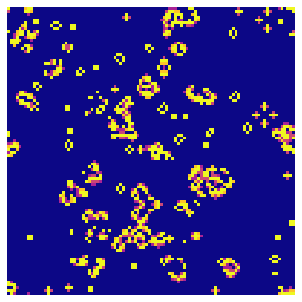

In [3]:
space = np.random.choice([0,1],size=M*M,p=[1-p,p]).reshape((M,M))
space = randomize(space)

fig = plt.figure()
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plot =ax.imshow(space,cmap='plasma')

def init():
    plot.set_data(space)
    return [plot]

def update(j, *fargs):
    if j % 100 == 0:
        print("Iter {}".format(j))
    space_out_1 = game(space)
    space_out_2 = game(space_out_1).astype(float)
    space_out_3 = game(space_out_2).astype(float)
    space_out_4 = game(space_out_3).astype(float)
    
    for i in range(space.shape[0]):
        for j in range(space.shape[1]):
            space[i,j] = space_out_1[i,j]
    if (space - space_out_1).sum() == 0 or (space - space_out_2).sum() == 0:
        random_blob(space) 
            
    plot.set_data(space_out_1+0.5*space_out_2+0.25*space_out_3+0.125*space_out_4)
    return [plot]

anim = FuncAnimation(fig, update, init_func = init, frames=500, interval = 50, blit=True)
WriterClass = animation.writers['ffmpeg']
writer = WriterClass(fps=10, metadata=dict(artist='bww'), bitrate=1800)
anim.save('anim.mp4',savefig_kwargs={'facecolor':'black'})

In [ ]:
print(np.unique(space))